# Sales Analytics with SQL & Python

Objectif : analyser les transactions de ventes par pays et par mois.  
Nous allons étudier :
- Le nombre total de transactions  
- Les montants associés  
- La comparaison entre transactions approuvées et déclinées  
- Les tendances mensuelles  


In [3]:
#Import et configuration 

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [ ]:
db_path = "sales.db"  # fichier SQLite qui sera créé
conn = sqlite3.connect(db_path)

with open("../data/transactions.sql", "r", encoding="utf-8") as f:
    sql_script = f.read()

conn.executescript(sql_script)  # crée la table et insère les données
print("✅ Base initialisée dans", db_path)

Ventes totales par mois

In [3]:
query = """
SELECT 
    strftime('%Y-%m', trans_date) AS month,
    COUNT(*) AS total_transactions,
    SUM(amount) AS total_amount
FROM Transactions
GROUP BY strftime('%Y-%m', trans_date)
ORDER BY month;
"""
df_monthly = pd.read_sql(query, conn)
df_monthly


,month,total_transactions,total_amount
0,2025-01,5,3900
1,2025-02,5,3900
2,2025-03,10,6470


Barplot ventes mensuelles

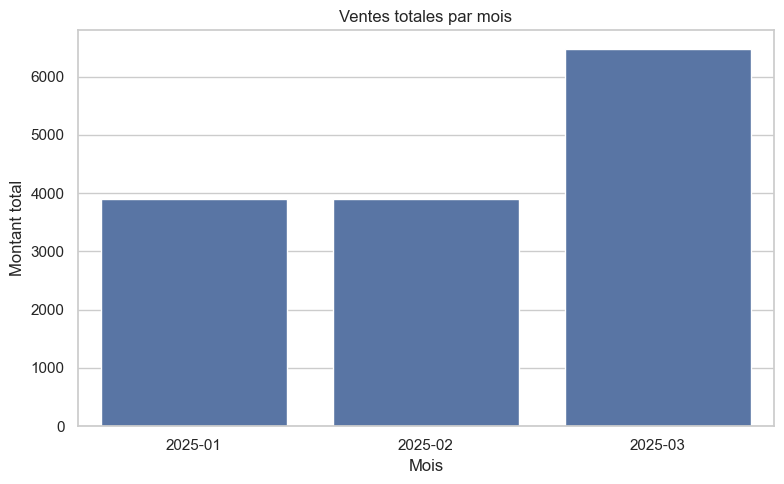

In [4]:
sns.barplot(data=df_monthly, x="month", y="total_amount")
plt.title("Ventes totales par mois")
plt.ylabel("Montant total")
plt.xlabel("Mois")
plt.tight_layout()
plt.show()


ventes approuvees vs refusees

In [5]:
query2 = """
SELECT 
    strftime('%Y-%m', trans_date) AS month,
    SUM(CASE WHEN state = 'approved' THEN amount ELSE 0 END) AS approved_amount,
    SUM(CASE WHEN state = 'declined' THEN amount ELSE 0 END) AS declined_amount
FROM Transactions
GROUP BY strftime('%Y-%m', trans_date)
ORDER BY month;
"""
df_status = pd.read_sql(query2, conn)
df_status


,month,approved_amount,declined_amount
0,2025-01,1800,2100
1,2025-02,3150,750
2,2025-03,5300,1170


Barres empilees

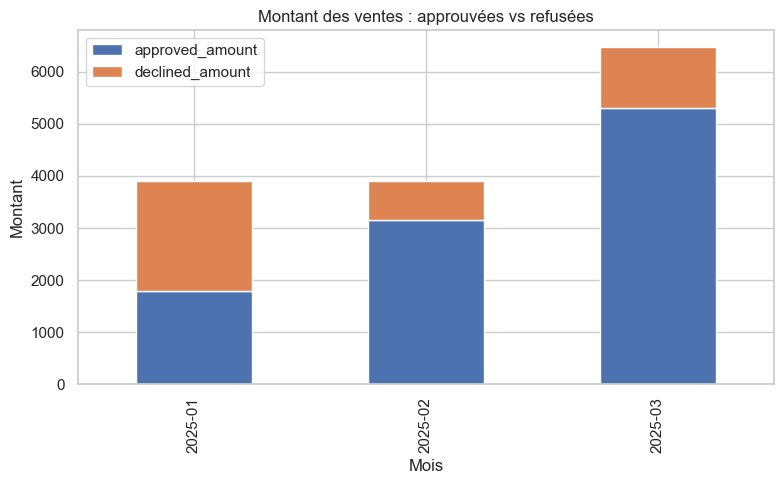

In [6]:
df_status_plot = df_status.set_index("month")
df_status_plot.plot(kind="bar", stacked=True)
plt.title("Montant des ventes : approuvées vs refusées")
plt.ylabel("Montant")
plt.xlabel("Mois")
plt.tight_layout()
plt.show()


ventes par pays

In [7]:
query3 = """
SELECT 
    country,
    COUNT(*) AS total_transactions,
    SUM(amount) AS total_amount,
    SUM(CASE WHEN state = 'approved' THEN amount ELSE 0 END) AS approved_amount
FROM Transactions
GROUP BY country
ORDER BY total_amount DESC;
"""
df_country = pd.read_sql(query3, conn)
df_country


,country,total_transactions,total_amount,approved_amount
0,Benin,6,4960,2910
1,Algerie,6,4690,4370
2,Cameroun,8,4620,2970


Barplot ventes par pays

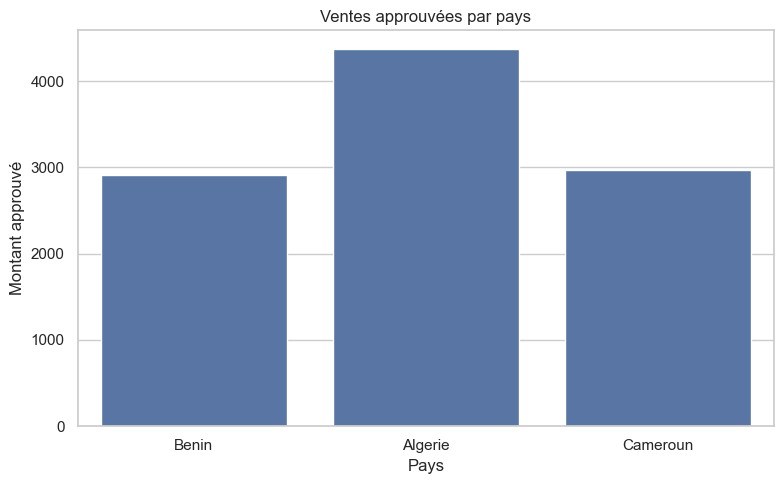

In [8]:
sns.barplot(data=df_country, x="country", y="approved_amount")
plt.title("Ventes approuvées par pays")
plt.ylabel("Montant approuvé")
plt.xlabel("Pays")
plt.tight_layout()
plt.show()


top produits

In [9]:
query4 = """
SELECT 
    product,
    COUNT(*) AS sold_count,
    SUM(amount) AS total_amount,
    SUM(CASE WHEN state = 'approved' THEN amount ELSE 0 END) AS approved_amount
FROM Transactions
GROUP BY product
ORDER BY total_amount DESC;
"""
df_products = pd.read_sql(query4, conn)
df_products


,Product,sold_count,total_amount,approved_amount
0,Laptop,6,7600,6300
1,Smartphone,4,3300,900
2,Tablet,4,1950,1950
3,Smartwatch,3,930,610
4,Headphones,3,490,490
